In [4]:
import pandas as pd

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [207]:
gene_ref_loc = '/home/ggorin/ref/refdata-gex-mm10-2020-A/kallisto-D/ref.t2g'
gene_ref = pd.read_csv(gene_ref_loc,header=None,sep='\t')
gene_ref = gene_ref.iloc[:,1:3]

gene_ref.columns = ['gene_id','gene_name']
gene_ref['gene_id'] = gene_ref['gene_id'].str[:-2]
gene_ref.set_index('gene_id',inplace=True)
gene_ref = gene_ref.drop_duplicates()

/home/ggorin/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [210]:
gene_ref[gene_ref['gene_name']=='Gnai3']

,gene_name
gene_id,
ENSMUSG00000000001,Gnai3


In [258]:
mesc_data = pd.read_csv('Fig1G_source_data.csv',header=0)

In [260]:
# mesc_data

In [261]:
mesc_data = mesc_data.iloc[:,2:]
mesc_data.drop_duplicates(subset=['ensembl_gene_id'],inplace=True)
mesc_data.set_index('ensembl_gene_id',inplace=True)

In [262]:
gene_ref.index.isin(mesc_data.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [263]:
gene_ref=gene_ref[gene_ref.index.isin(mesc_data.index)]

In [264]:
mesc_data=mesc_data[mesc_data.index.isin(gene_ref.index)]

In [265]:
mesc_data.sort_index(inplace=True)
gene_ref.sort_index(inplace=True)

In [266]:
mesc_data

,log.burst.freq,log.burst.size,log.norm.int.noise
ensembl_gene_id,,,
ENSMUSG00000000001,-0.505909,1.573751,0.028216
ENSMUSG00000000056,-1.377528,1.189449,-0.074652
ENSMUSG00000000058,-3.122983,1.630836,0.842432
ENSMUSG00000000078,-0.469471,1.826132,0.338746
ENSMUSG00000000088,-0.455036,1.449607,0.068836
...,...,...,...
ENSMUSG00000117315,-1.392694,-1.505150,-0.214050
ENSMUSG00000117317,-1.765070,0.133329,-0.135730
ENSMUSG00000117322,-2.035946,0.384511,-0.094050


In [267]:
# gene_ref

In [268]:
txdict

{'Gnai3': 38867,
 'Cdc45': 31541,
 'H19': 2615,
 'Pbsn': 15723,
 'Scml2': 175689,
 'Klf6': 8913,
 'Narf': 18604,
 'Apoh': 71043,
 'Cav2': 7931,
 'Wnt3': 43808,
 'Zfy2': 64395,
 'Xpo6': 98787,
 'Fer': 276435,
 'Wnt9a': 26625,
 'Tbx2': 9398,
 'Ngfr': 18918,
 'Cox5a': 11153,
 'Scmh1': 124906,
 'Tbx4': 29676,
 'Brat1': 14369,
 'Slfn4': 15031,
 'Fgf6': 12602,
 'Tfe3': 12643,
 'Pih1d2': 7680,
 'Btbd17': 4729,
 'Sdhd': 7456,
 'Ins2': 64726,
 'Gpr107': 66460,
 'Nalcn': 350511,
 'Slc22a18': 25599,
 'Th': 38377,
 'Itgb2l': 21332,
 'Ccnd2': 27032,
 'Scnn1g': 33997,
 'Fgf23': 8507,
 'Igsf5': 60454,
 'Gna12': 72024,
 'Dlat': 25148,
 'Axin2': 30435,
 'Pemt': 75876,
 'Ckmt1': 6024,
 'Tpd52l1': 113583,
 'Scpep1': 31446,
 'Rnf17': 122452,
 'Cdh1': 66896,
 'Wap': 3156,
 'Rtca': 19246,
 'Mnt': 14806,
 'Itgb2': 35457,
 'Trappc10': 57917,
 'Comt': 19967,
 'Fap': 73133,
 'Dgke': 31672,
 'Gmpr': 46357,
 'Egfl6': 62714,
 'Drp2': 52023,
 'Mx1': 15873,
 'Tbrg4': 10470,
 'Ccm2': 49858,
 'Alox12': 13897,
 'Gcg': 

In [269]:
gene_ref

,gene_name
gene_id,
ENSMUSG00000000001,Gnai3
ENSMUSG00000000056,Narf
ENSMUSG00000000058,Cav2
ENSMUSG00000000078,Klf6
ENSMUSG00000000088,Cox5a
...,...
ENSMUSG00000117315,1600022D10Rik
ENSMUSG00000117317,Gm49961
ENSMUSG00000117322,6330415G19Rik


In [270]:
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/')
import monod
from monod import preprocess

In [271]:
txdict = monod.preprocess.get_transcriptome('../../GP_2021_3/polyA_ref/gg_200524_mouse_genome_polyA_cum_1')

In [272]:
mesc_data = mesc_data.merge(gene_ref,left_index=True,right_index=True)

In [273]:
mesc_data

,log.burst.freq,log.burst.size,log.norm.int.noise,gene_name
ensembl_gene_id,,,,
ENSMUSG00000000001,-0.505909,1.573751,0.028216,Gnai3
ENSMUSG00000000056,-1.377528,1.189449,-0.074652,Narf
ENSMUSG00000000058,-3.122983,1.630836,0.842432,Cav2
ENSMUSG00000000078,-0.469471,1.826132,0.338746,Klf6
ENSMUSG00000000088,-0.455036,1.449607,0.068836,Cox5a
...,...,...,...,...
ENSMUSG00000117315,-1.392694,-1.505150,-0.214050,1600022D10Rik
ENSMUSG00000117317,-1.765070,0.133329,-0.135730,Gm49961
ENSMUSG00000117322,-2.035946,0.384511,-0.094050,6330415G19Rik


In [274]:
length = []
for gn in mesc_data['gene_name']:
    if gn in txdict.keys():
        length.append(txdict[gn])
    else:
        length.append(None)

In [275]:
mesc_data['lengths']=length

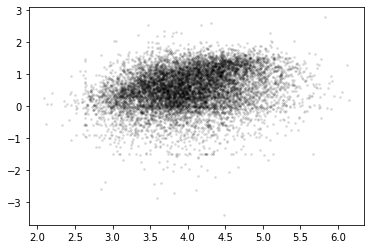

In [276]:
plt.scatter(np.log10(mesc_data['lengths']),mesc_data['log.burst.size'],3,'k',alpha=0.1)


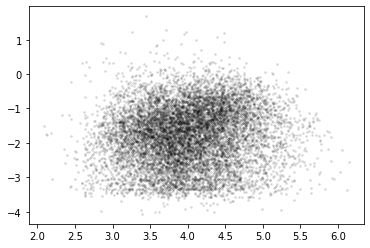

In [277]:
plt.scatter(np.log10(mesc_data['lengths']),mesc_data['log.burst.freq'],3,'k',alpha=0.1)


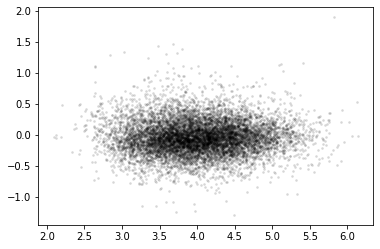

In [278]:
plt.scatter(np.log10(mesc_data['lengths']),mesc_data['log.norm.int.noise'],3,'k',alpha=0.1)


In [279]:
from monod import analysis

In [280]:
sr = monod.analysis.load_search_results('./fits/gg_230313_025_desai_1/desai_dmso_cr/Bursty_Poisson_8x9/grid_scan_results_upd.res')

In [281]:
sd = monod.analysis.load_search_data('./fits/gg_230313_025_desai_1/desai_dmso_cr/raw.sd')

In [246]:
bs = np.log10(sd.layers[1].var(1)/sd.layers[1].mean(1)-1)

/tmp/ipykernel_302771/2126356571.py:1: RuntimeWarning: invalid value encountered in log10
  bs = np.log10(sd.layers[1].var(1)/sd.layers[1].mean(1)-1)


In [286]:
rawmean = np.log10(sd.layers[1].mean(1))

In [287]:
rawmean.shape

(1000,)

In [288]:
phys_opt = sr.phys_optimum

In [289]:
phys_opt

array([[ 0.92372876, -1.31297272, -0.26581289],
       [-0.56804594, -1.8       , -1.10773585],
       [ 1.216902  , -0.45971944,  1.13466722],
       ...,
       [ 0.93316074, -0.43725202,  1.00872087],
       [ 1.00773453, -1.02102286,  0.2668623 ],
       [ 0.47789441, -1.16604348, -0.39136991]])

In [290]:
np.where(gene_names=='Cops5')[0][0]

0

In [291]:
monodb = []
monodg = []
basicb = []
rawmean_ = []
for gn in mesc_data['gene_name']:
    if gn in sr.gene_names:
        ind = np.where(sr.gene_names==gn)[0][0]
        monodb.append(phys_opt[ind,0])
        monodg.append(phys_opt[ind,2])
        basicb.append(bs[ind])
        rawmean_.append(rawmean[ind])
    else:
        monodb.append(None)
        monodg.append(None)
        basicb.append(None)
        rawmean_.append(None)

In [292]:
mesc_data['monod_burst_size']=monodb
mesc_data['monod_deg_rate']=monodg
mesc_data['basic_burst_size']=basicb
mesc_data['desai_spliced_mean']=rawmean_

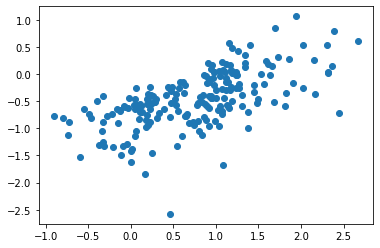

In [293]:
plt.scatter(monodb,basicb)

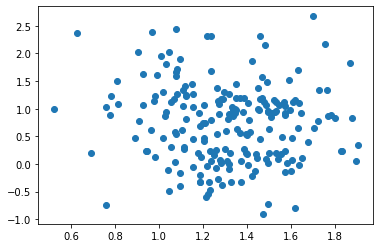

In [255]:
gf = mesc_data['monod_burst_size'].notna()
# plt.hist(mesc_data['log.burst.size'][gf],alpha=0.5)
# plt.hist(mesc_data['monod_burst_size'][gf],alpha=0.5)
plt.scatter(mesc_data['log.burst.size'][gf],mesc_data['monod_burst_size'][gf]) 
# plt.scatter(mesc_data['log.burst.freq'][gf],-mesc_data['monod_deg_rate'][gf]) 

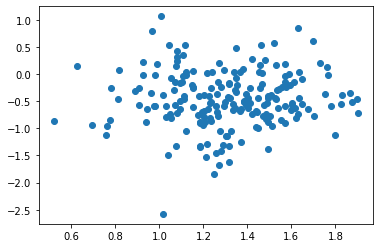

In [256]:
gf = mesc_data['basic_burst_size'].notna()
# plt.hist(mesc_data['log.burst.size'][gf],alpha=0.5)
# plt.hist(mesc_data['monod_burst_size'][gf],alpha=0.5)
plt.scatter(mesc_data['log.burst.size'][gf],mesc_data['basic_burst_size'][gf]) 
# plt.scatter(mesc_data['log.burst.freq'][gf],-mesc_data['monod_deg_rate'][gf]) 

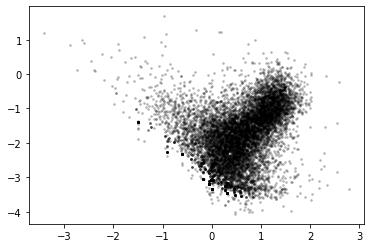

In [257]:
plt.scatter(mesc_data['log.burst.size'],mesc_data['log.burst.freq'],3,'k',alpha=0.2) 
# plt.scatter(mesc_data['log.burst.size']+mesc_data['log.burst.freq'],mesc_data['log.burst.size'],3,'k',alpha=0.2) 
# plt.scatter(mesc_data['log.burst.size'],mesc_data['log.burst.freq']) 


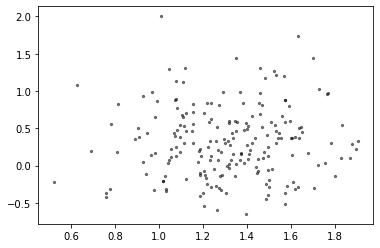

In [298]:
plt.scatter(mesc_data['log.burst.size'],mesc_data['desai_spliced_mean'],5,'k',alpha=0.5) 
